Concept:

Instead of always decreasing the LR, this scheduler oscillates between min and max values.

Why? It helps avoid getting stuck in sharp local minima and improves generalization.

Used in cases where gradient updates fluctuate, like training very deep networks.

In [1]:
import torch

import torch.nn as nn

import torch.optim as optim

import matplotlib.pyplot as plt

In [2]:
# Sample Model

model = nn.Linear(10,2)

optimizer = optim.SGD(model.parameters(), lr=0.001)

In [3]:
# CyclicLR: LR oscillates between 0.001 and 0.1 every 10 steps

scheduler = optim.lr_scheduler.CyclicLR(optimizer, 
                                        base_lr=0.001, 
                                        max_lr=0.1, 
                                        step_size_up=10, 
                                        mode='triangular')

In [4]:
# Tracking LR values

lrs = []

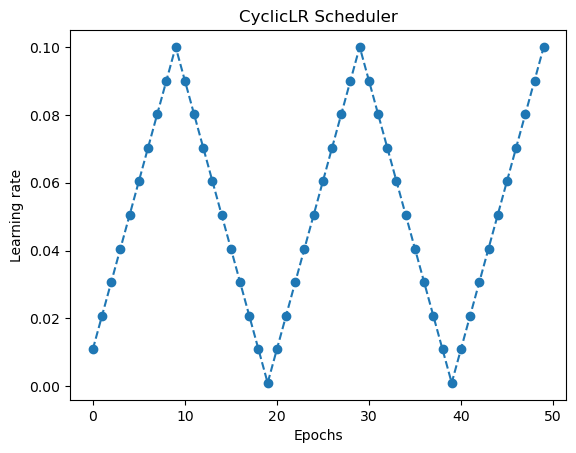

In [5]:
for epoch in range(50):   # Running for 50 epochs

    optimizer.step()

    scheduler.step()

    lrs.append(optimizer.param_groups[0]['lr'])


# Plot Learning Rate over Epochs

plt.plot(range(50), lrs,  marker='o', linestyle='--')

plt.xlabel('Epochs')

plt.ylabel('Learning rate')

plt.title('CyclicLR Scheduler')

plt.show()